NIM : 221351112 <br>
nama : Raffi Argianda <br>
kelas : Malam B

# import library

In [1]:
# di sini diberikan list library yang dgunakan
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix


import plotly.express as px
import plotly.graph_objects as go

# load dataset

In [2]:
# load dataset uts
data = pd.read_csv('pegawai.csv')
data.head()

,ID Pegawai,Lama Bekerja (tahun),Jumlah Proyek Selesai,Tingkat Pendidikan,Pelatihan Terbaru (tahun),Jam Kerja per Minggu,Penilaian Kepemimpinan,Keahlian Teknis (0-10),Kehadiran (%),Departemen,Status Kepegawaian,Tingkat Stres,Performa
0,1,8,17,S2,0,44,1,5,91,IT,Tetap,Tinggi,Tinggi
1,2,12,9,S1,1,33,4,10,78,IT,Tetap,Rendah,Sedang
2,3,9,15,SMA,0,45,6,1,83,Marketing,Kontrak,Tinggi,Sedang
3,4,1,13,S2,2,44,8,5,89,Marketing,Magang,Sedang,Rendah
4,5,3,28,SMA,1,31,7,5,90,Finance,Magang,Rendah,Sedang


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID Pegawai                 100 non-null    int64 
 1   Lama Bekerja (tahun)       100 non-null    int64 
 2   Jumlah Proyek Selesai      100 non-null    int64 
 3   Tingkat Pendidikan         100 non-null    object
 4   Pelatihan Terbaru (tahun)  100 non-null    int64 
 5   Jam Kerja per Minggu       100 non-null    int64 
 6   Penilaian Kepemimpinan     100 non-null    int64 
 7   Keahlian Teknis (0-10)     100 non-null    int64 
 8   Kehadiran (%)              100 non-null    int64 
 9   Departemen                 100 non-null    object
 10  Status Kepegawaian         100 non-null    object
 11  Tingkat Stres              100 non-null    object
 12  Performa                   100 non-null    object
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


# exploratory data analysis

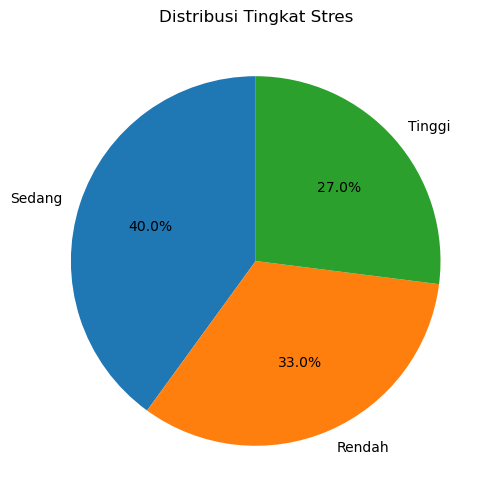

In [4]:
stres_counts = data['Tingkat Stres'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(stres_counts.values, labels=stres_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Tingkat Stres')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

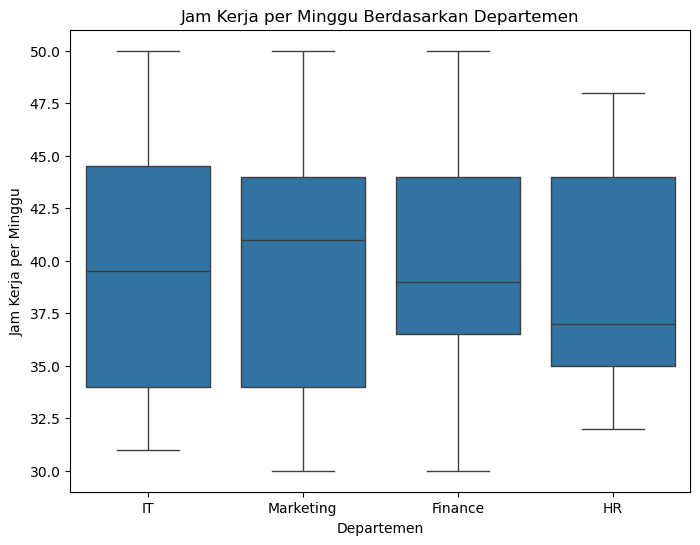

In [5]:
plt.figure(figsize=(8,6))
sns.boxplot(data = data, x = 'Departemen', y = 'Jam Kerja per Minggu')
plt.title('Jam Kerja per Minggu Berdasarkan Departemen')
plt.xlabel('Departemen')
plt.ylabel('Jam Kerja per Minggu')
plt.show

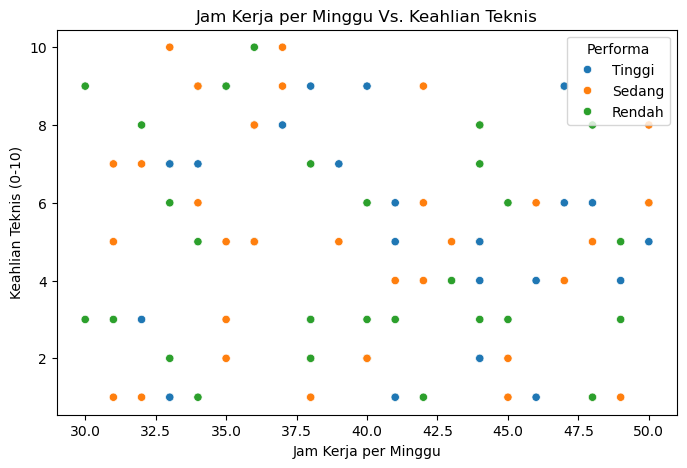

In [6]:
# 4
plt.figure(figsize=(8,5))
sns.scatterplot(data = data, x = 'Jam Kerja per Minggu', y = 'Keahlian Teknis (0-10)', hue = 'Performa')
plt.title('Jam Kerja per Minggu Vs. Keahlian Teknis')
plt.xlabel('Jam Kerja per Minggu')
plt.ylabel('Keahlian Teknis (0-10)')
plt.legend(title = 'Performa')
plt.show()

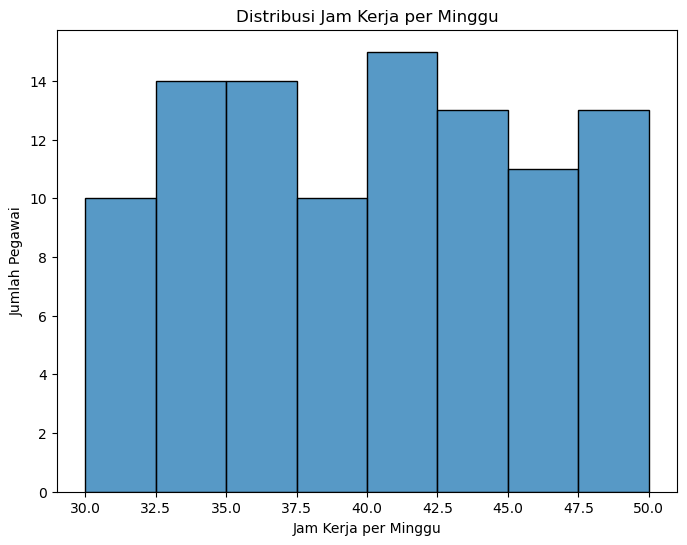

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(data = data, x = 'Jam Kerja per Minggu')
plt.title('Distribusi Jam Kerja per Minggu')
plt.ylabel('Jumlah Pegawai')
plt.show()

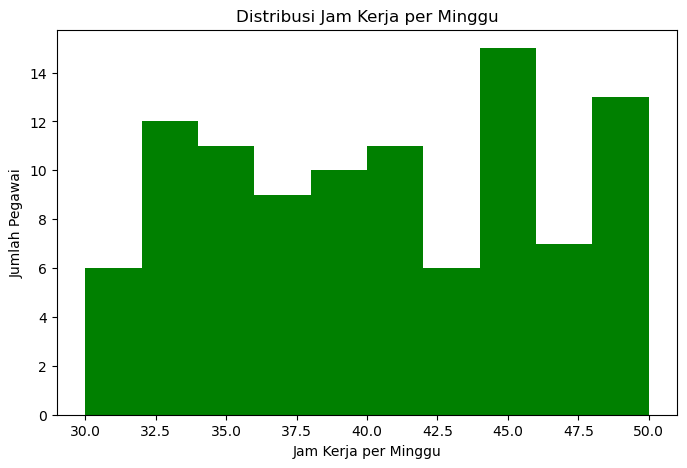

In [8]:
plt.figure(figsize=(8,5))
plt.hist(data['Jam Kerja per Minggu'], color = 'green')
plt.title('Distribusi Jam Kerja per Minggu')
plt.xlabel('Jam Kerja per Minggu')
plt.ylabel('Jumlah Pegawai')
plt.show()

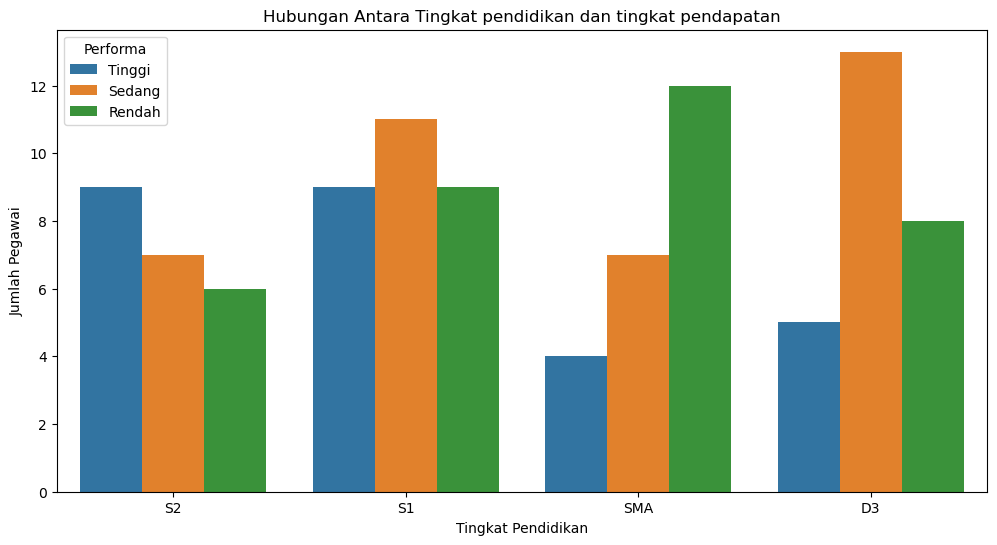

In [9]:
# eda varian 5
plt.figure(figsize=(12,6))
sns.countplot(data = data, x ='Tingkat Pendidikan', hue = 'Performa')
plt.title('Hubungan Antara Tingkat pendidikan dan tingkat pendapatan')
plt.ylabel('Jumlah Pegawai')
plt.show()

# data preprocessing

In [10]:
data_encode = pd.DataFrame(data)

In [11]:
data_encode.head()

,ID Pegawai,Lama Bekerja (tahun),Jumlah Proyek Selesai,Tingkat Pendidikan,Pelatihan Terbaru (tahun),Jam Kerja per Minggu,Penilaian Kepemimpinan,Keahlian Teknis (0-10),Kehadiran (%),Departemen,Status Kepegawaian,Tingkat Stres,Performa
0,1,8,17,S2,0,44,1,5,91,IT,Tetap,Tinggi,Tinggi
1,2,12,9,S1,1,33,4,10,78,IT,Tetap,Rendah,Sedang
2,3,9,15,SMA,0,45,6,1,83,Marketing,Kontrak,Tinggi,Sedang
3,4,1,13,S2,2,44,8,5,89,Marketing,Magang,Sedang,Rendah
4,5,3,28,SMA,1,31,7,5,90,Finance,Magang,Rendah,Sedang


In [12]:
data['Departemen'].unique()

array(['IT', 'Marketing', 'Finance', 'HR'], dtype=object)

In [13]:
data_encode['Departemen'] = data_encode['Departemen'].map({'IT': 0, 'Marketing':1,'Finance':2,'HR':3})
data_encode['Tingkat Stres'] = data_encode['Tingkat Stres'].map({'Rendah':3, 'Sedang':4, 'Tinggi':5})
data_encode['Status Kepegawaian'] = data_encode['Status Kepegawaian'].map({'Kontrak':0, 'Magang':1,'Tetap':2})
data_encode['Performa'] = data_encode['Performa'].map({'Rendah':0, 'Sedang':1,'Tinggi':2})

In [14]:
categorical_df = data_encode.copy()

# modeling

In [15]:
X_categorical = categorical_df[['Penilaian Kepemimpinan','Keahlian Teknis (0-10)','Kehadiran (%)','Departemen','Status Kepegawaian','Tingkat Stres']]
y_categorical = categorical_df['Performa']

In [16]:
categorical_df.head()

,ID Pegawai,Lama Bekerja (tahun),Jumlah Proyek Selesai,Tingkat Pendidikan,Pelatihan Terbaru (tahun),Jam Kerja per Minggu,Penilaian Kepemimpinan,Keahlian Teknis (0-10),Kehadiran (%),Departemen,Status Kepegawaian,Tingkat Stres,Performa
0,1,8,17,S2,0,44,1,5,91,0,2,5,2
1,2,12,9,S1,1,33,4,10,78,0,2,3,1
2,3,9,15,SMA,0,45,6,1,83,1,0,5,1
3,4,1,13,S2,2,44,8,5,89,1,1,4,0
4,5,3,28,SMA,1,31,7,5,90,2,1,3,1


# simulasi

In [17]:
# simulasikan model dengan inputan baru
X_train, X_test, y_train, y_test = train_test_split(X_categorical, y_categorical, test_size=0.5, random_state = 42)

In [18]:
model = CategoricalNB()
model.fit(X_train, y_train)

CategoricalNB()

In [19]:
new_data_categorical = np.array([[8,9,98,0,2,0]])
new_prediction_cat = model.predict(new_data_categorical)

c:\Users\rapsa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


In [20]:
# menampilkan akurasi / confusion matrix
y_pred = model.predict(new_data_categorical)

c:\Users\rapsa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


In [21]:
new_prediction_cat

array([2], dtype=int64)

In [22]:
model_accuracy = accuracy_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [50, 1]

In [ ]:
print(f'Mean Squared Error (MSE) : {mse}')
print(f'R-Squared (R2) : {r2}')

Mean Squared Error (MSE) : 4407.260435740566
R-Squared (R2) : -1.361032376289589
